In [419]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from scipy import stats
import math
from PIL import Image

In [420]:
df = pd.read_csv("data/kc_house_data_no_miss_values.csv")
df =df.drop(["Unnamed: 0"], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0,1


In [427]:
df = df[df["price"] < 1500000]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0,1
21404,1200000.0,4,3.00,2150,8119,2.0,0,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1,0
21407,1450000.0,5,2.75,3090,19865,1.0,0,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0,1


In [421]:
#Dropping outliers
df = df[df["price"] < 1500000]
df = df[(np.abs(stats.zscore(df["sqft_living"])) < 3)]
df = (df[df["bedrooms"] < 7])
df = (df[df["bathrooms"] < 6])
df = (df[df["sqft_living"] < 8000])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0,1
21404,1200000.0,4,3.00,2150,8119,2.0,0,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1,0
21407,1450000.0,5,2.75,3090,19865,1.0,0,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0,1


In [425]:
df_numerical = df[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15','Income',]].copy()
df_numerical

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,Income
0,221900.0,1180,5650,1340,5650,113555.0
1,205425.0,880,6780,1190,6780,113555.0
2,445000.0,2100,8201,2660,8712,113555.0
3,236000.0,1300,5898,1320,7619,113555.0
4,170000.0,860,5265,1650,8775,113555.0
...,...,...,...,...,...,...
21398,1260000.0,3110,9930,3650,14399,7190.0
21404,1200000.0,2150,8119,1590,8119,7190.0
21407,1450000.0,3090,19865,2970,19862,7190.0
21410,1350000.0,2070,9600,3000,16215,7190.0


In [426]:
df_numerical = df_numerical.apply(lambda x: np.log(x), axis='rows')
df_numerical

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,Income
0,12.309982,7.073270,8.639411,7.200425,8.639411,11.640043
1,12.232836,6.779922,8.821732,7.081709,8.821732,11.640043
2,13.005830,7.649693,9.012011,7.886081,9.072457,11.640043
3,12.371587,7.170120,8.682369,7.185387,8.938400,11.640043
4,12.043554,6.756932,8.568836,7.408531,9.079662,11.640043
...,...,...,...,...,...,...
21398,14.046622,8.042378,9.203316,8.202482,9.574914,8.880446
21404,13.997832,7.673223,9.001962,7.371489,9.001962,8.880446
21407,14.187074,8.035926,9.896715,7.996317,9.896564,8.880446
21410,14.115615,7.635304,9.169518,8.006368,9.693692,8.880446


df_log = pd.DataFrame()
df_log['price'] = df['price'].map(lambda x: np.log(x))
df_log['bedrooms'] = df['bedrooms'].map(lambda x: np.log(x))
df_log['bathrooms'] = df['bathrooms'].map(lambda x: np.log(x+1))
df_log['sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))
df_log['sqft_lot'] = df['sqft_lot'].map(lambda x: np.log(x))
df_log['floors'] = df['floors'].map(lambda x: np.log(x))
#df_log['waterfront'] = df['waterfront'].map(lambda x: np.log(x)):
#<ipython-input-19-3d82fac611a8>:8: RuntimeWarning: divide by zero encountered in log
df_log['view_cat'] = df['view_cat'].map(lambda x: np.log(x))
df_log['condition'] = df['condition'].map(lambda x: np.log(x))
df_log['graden'] = df['grade'].map(lambda x: np.log(x))
df_log['sqft_above'] = df['sqft_above'].map(lambda x: np.log(x))
df_log['sqft_basement'] = df['sqft_basement'].map(lambda x: np.log(x))
df_log['yr_built'] = df['yr_built'].map(lambda x: np.log(x))
df_log['yr_renovated'] = df['yr_renovated'].map(lambda x: np.log(x))
df_log['zipcode'] = df['zipcode'].map(lambda x: np.log(x))
df_log['lat'] = df['lat'].map(lambda x: np.log(x))
df_log['long'] = df['long'].map(lambda x: np.log(x))
df_log['sqft_living15'] = df['sqft_living15'].map(lambda x: np.log(x))
df_log['sqft_lot15'] = df['sqft_lot15'].map(lambda x: np.log(x))
df_log['Income'] = df['Income'].map(lambda x: np.log(x))
df_log['house_age'] = df['house_age'].map(lambda x: np.log(x))
df_log['year_sold'] = df['year_sold'].map(lambda x: np.log(x))
df_log['season'] = df['season'].map(lambda x: np.log(x))
df_log['renovated'] = df['renovated'].map(lambda x: np.log(x))
df_log.head()


In [354]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0,1
21404,1200000.0,4,3.00,2150,8119,2.0,0,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1,0
21407,1450000.0,5,2.75,3090,19865,1.0,0,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0,1


In [350]:
df.to_csv("data/kc_house_data_clean.csv")

initial_corr = df.corr().sort_values(by="price", ascending=False)
initial_corr

In [270]:
X = df.drop("price", axis=1)
y= df["price"]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16532, 23)
(4134, 23)
(16532,)
(4134,)


In [273]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
852,3,1.75,1560,8456,1.0,0,4,8,1560,0.0,1970,0.0,16,47.7769,-122.250,2230,13109,90167.0,52,2014,2,0,0
7731,4,2.50,3150,5979,2.0,0,0,10,3150,0.0,2005,0.0,28,47.7082,-122.101,3150,6595,234502.0,17,2014,2,0,0
12251,5,1.50,2170,8610,1.0,0,2,8,1230,940.0,1959,0.0,7,47.6111,-122.126,1670,8610,98190.0,63,2014,3,0,0
12273,4,2.25,2170,10000,1.0,0,0,9,1420,750.0,1975,0.0,7,47.6219,-122.109,2390,11000,98190.0,47,2014,2,0,0
1823,2,2.50,2280,6230,1.0,0,0,9,2280,0.0,2005,0.0,29,47.7065,-122.013,1640,5931,66004.0,17,2014,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,3,1.50,1090,10454,1.0,0,0,7,1090,0.0,1963,0.0,26,47.3425,-122.082,1230,12196,217292.0,59,2014,3,0,0
12260,5,2.00,2290,7125,1.0,0,0,8,1190,1100.0,1964,0.0,7,47.6340,-122.119,1460,7920,98190.0,58,2014,1,0,0
5462,4,2.00,1910,6960,1.5,0,4,9,1910,0.0,1941,0.0,42,47.6893,-122.348,1360,3300,277894.0,81,2014,1,0,0
868,3,1.00,1190,9000,1.0,0,0,8,1190,0.0,1968,0.0,16,47.7700,-122.264,1960,7200,90167.0,54,2015,0,0,0


In [274]:
model = sm.OLS(y, sm.add_constant(X), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1838.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:20:50   Log-Likelihood:            -2.7417e+05
No. Observations:               20666   AIC:                         5.484e+05
Df Residuals:                   20643   BIC:                         5.486e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -48.8408      3.137    -15.569

In [275]:
corr = df.corr().sort_values(by="price", ascending=False)

fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = corr, mask = np.triu(np.ones_like(corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [276]:
highest_corr = "sqft_living"

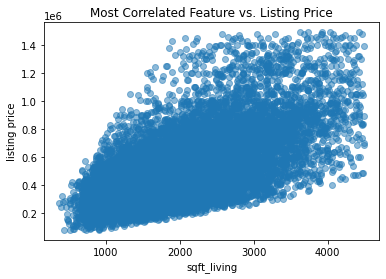

In [277]:
fig, ax = plt.subplots()

ax.scatter(X_train[highest_corr], y_train, alpha=0.5)
ax.set_xlabel(highest_corr)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [278]:
baseline_model = LinearRegression()

In [279]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_corr]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.40459612217536706
Validation score: 0.4049640708873629


In [280]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
852,3,1.75,1560,8456,1.0,0,4,8,1560,0.0,1970,0.0,16,47.7769,-122.250,2230,13109,90167.0,52,2014,2,0,0
7731,4,2.50,3150,5979,2.0,0,0,10,3150,0.0,2005,0.0,28,47.7082,-122.101,3150,6595,234502.0,17,2014,2,0,0
12251,5,1.50,2170,8610,1.0,0,2,8,1230,940.0,1959,0.0,7,47.6111,-122.126,1670,8610,98190.0,63,2014,3,0,0
12273,4,2.25,2170,10000,1.0,0,0,9,1420,750.0,1975,0.0,7,47.6219,-122.109,2390,11000,98190.0,47,2014,2,0,0
1823,2,2.50,2280,6230,1.0,0,0,9,2280,0.0,2005,0.0,29,47.7065,-122.013,1640,5931,66004.0,17,2014,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,3,1.50,1090,10454,1.0,0,0,7,1090,0.0,1963,0.0,26,47.3425,-122.082,1230,12196,217292.0,59,2014,3,0,0
12260,5,2.00,2290,7125,1.0,0,0,8,1190,1100.0,1964,0.0,7,47.6340,-122.119,1460,7920,98190.0,58,2014,1,0,0
5462,4,2.00,1910,6960,1.5,0,4,9,1910,0.0,1941,0.0,42,47.6893,-122.348,1360,3300,277894.0,81,2014,1,0,0
868,3,1.00,1190,9000,1.0,0,0,8,1190,0.0,1968,0.0,16,47.7700,-122.264,1960,7200,90167.0,54,2015,0,0,0


In [281]:
#df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long",'floors','sqft_basement',
#                 'yr_renovated','renovated','waterfront', 'sqft_lot','yr_built', 'condition', 'zipcode',
#                    'year_sold','season', 'house_age','Income','grade'], axis=1)

In [282]:
X_train_second_model = X_train_numeric.drop(["lat", "long",'floors',
                 'yr_renovated','renovated','sqft_lot','yr_built',
                   'year_sold','house_age',"sqft_above","sqft_living15"], axis=1).copy()

In [283]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4675557544159385
Validation score: 0.46491374315868544

Baseline Model
Train score:      0.40459612217536706
Validation score: 0.4049640708873629


In [284]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1207.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:20:51   Log-Likelihood:            -2.2310e+05
No. Observations:               16532   AIC:                         4.462e+05
Df Residuals:                   16519   BIC:                         4.463e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.675e+05   9903.992     16.908      0.000    1.48e+05    1.87e+05
bedrooms      -2.817e+04   2056.487    -13.697      0.000   -3.22e+04   -2.41e+04
bathrooms      2.349e+04   2864.098      8.200      0.000    1.79e+04    2.91e+04
sqft_living     204.0001      3.079     66.253      0.000     197.965     210.035
waterfront      1.69e+05   2.36e+04      7.153      0.000    1.23e+05    2.15e+05
condition      1.876e+04   1129.393     16.608      0.000    1.65e+04     2.1e+04
grade         -7616.2278    698.517    -10.903      0.000   -8985.396   -6247.060
sqft_basement   -16.7348      3.852     -4.344      0.000     -24.286      -9.184
zipcode        1283.8051     75.261     17.058      0.000    1136.285    1431.325
sqft_lot15       -0.4604      0.056     -8.208      0.000      -0.570      -0.350
Income           -0.1761      0.024     -7.343      0.000      -0.223      -0.129
season        -5163.4736   1317.281     -3.920      0.000   -7745.487   -2581.460
view_cat       1.201e+05   5238.171     22.925      0.000     1.1e+05     1.3e+05
==============================================================================
Omnibus:                     2194.230   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4066.592
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       4.717   Cond. No.                     2.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
significant_features = ["sqft_living", "zipcode","sqft_basement","condition","waterfront",]

In [286]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4322265248735975
Validation score: 0.43078649545378084

Second Model
Train score:      0.4675557544159385
Validation score: 0.46491374315868544

Baseline Model
Train score:      0.40459612217536706
Validation score: 0.4049640708873629


In [287]:
X_train_final = X_train[significant_features]
X_test_final = X_test[significant_features]

In [288]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.4461547969432803

In [289]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living         211.634027
zipcode            1565.710123
sqft_basement       -14.253680
condition         16820.422656
waterfront       290924.189256
Name: Coefficients, dtype: float64

Intercept: 7547.067436012498


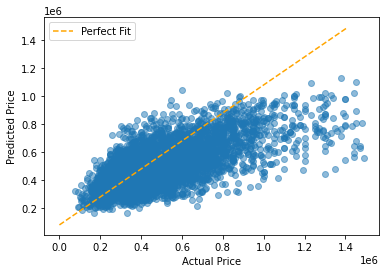

In [290]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

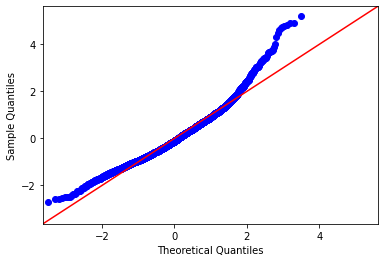

In [291]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living      3.212495
zipcode          2.758204
sqft_basement    1.683425
condition        1.417805
waterfront       1.005754
Name: Variance Inflation Factor, dtype: float64

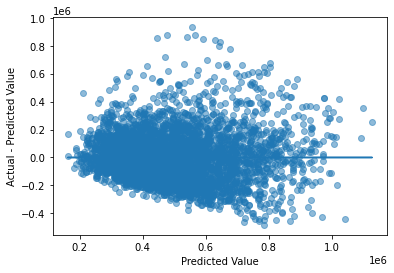

In [293]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

<AxesSubplot:>

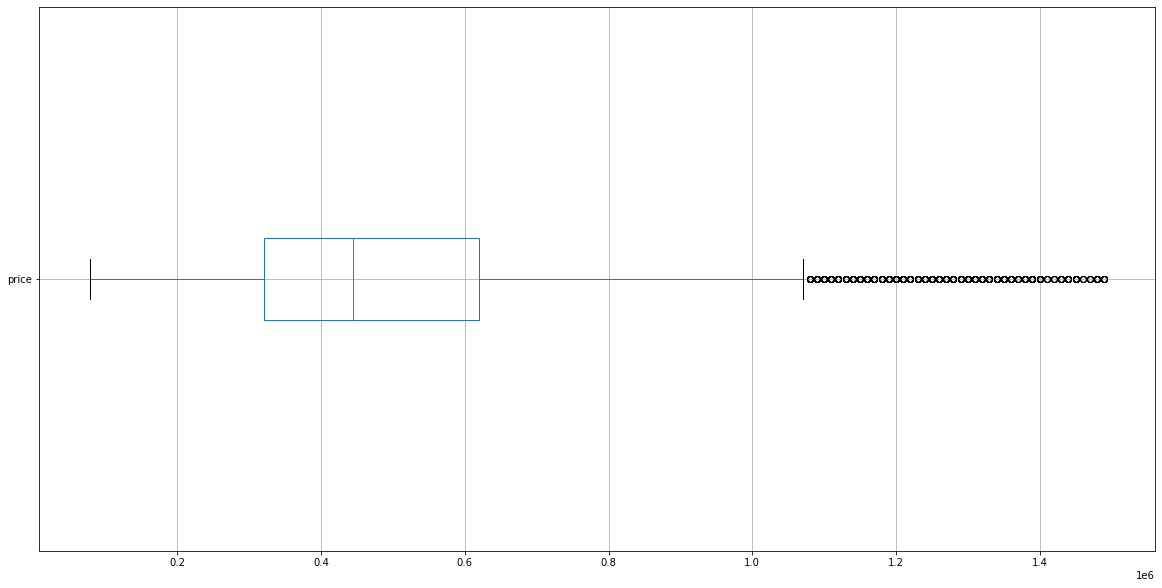

In [ ]:
df.boxplot('price', vert=False, figsize=(20,10))

In [ ]:
print('Summary statistics for prices for all houses')
print('Mean:' , df.price.mean())
print('Median: ', df.price.median())
print('Standard deviation: ', df.price.std())

print('\nSummary statistics for prices listed with waterfront')
waterfront_prop = df[df.waterfront == 1]
print('Mean: ', waterfront_prop.price.mean())
print('Median: ', waterfront_prop.price.median())
print('Standard deviation: ', waterfront_prop.price.std())

print('\nSummary statistics for prices listed with no waterfront')
non_waterfront_prop = df[df.waterfront==0]
print('Mean: ', non_waterfront_prop.price.mean())
print('Median: ', non_waterfront_prop.price.median())
print('Standard deviation', non_waterfront_prop.price.std())

Summary statistics for prices for all houses
Mean: 496804.3678989645
Median:  443975.0
Standard deviation:  240433.33132361717

Summary statistics for prices listed with waterfront
Mean:  859360.9589041095
Median:  825000.0
Standard deviation:  336127.93016021437

Summary statistics for prices listed with no waterfront
Mean:  495519.14325256157
Median:  442500.0
Standard deviation 239061.57693540168


C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

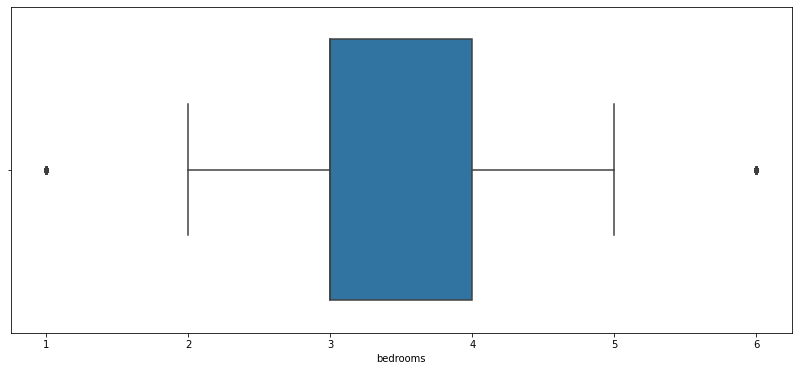

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(df.bedrooms)

<AxesSubplot:>

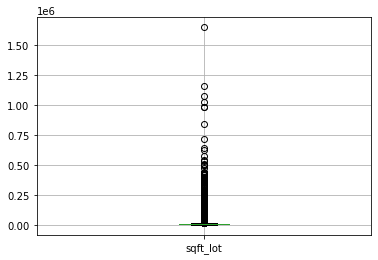

In [ ]:
df.boxplot(['sqft_lot'])

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


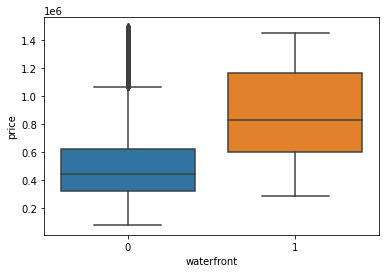

In [ ]:
ax = sns.boxplot(x=df.waterfront, y=df.price, data=df)

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
count,2.066600e+04,20666.000000,20666.000000,20666.000000,2.066600e+04,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000
mean,4.968044e+05,3.331511,2.065942,1994.818833,1.445070e+04,1.482967,0.003532,3.759363,0.853334,7.997193,1723.567405,265.558308,1970.838479,64.219007,35.380093,47.558549,-122.214262,1941.002516,12316.944498,145159.909416,51.161521,2014.325027,1.522839,0.032178
std,2.404333e+05,0.861012,0.709164,771.866307,3.917439e+04,0.538411,0.059330,0.872249,1.263963,2.031495,727.966641,407.580822,29.285387,352.211579,19.169282,0.140022,0.141550,627.823658,25426.663726,59171.016901,29.285387,0.468396,1.034973,0.176478
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7190.000000,7.000000,2014.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,4.000000,0.000000,8.000000,1180.000000,0.000000,1951.000000,0.000000,21.000000,47.465300,-122.330000,1480.000000,5045.250000,98510.000000,26.000000,2014.000000,1.000000,0.000000
50%,4.439750e+05,3.000000,2.250000,1880.000000,7.500000e+03,1.000000,0.000000,4.000000,0.000000,8.000000,1540.000000,0.000000,1974.000000,0.000000,34.000000,47.569500,-122.232000,1820.000000,7541.500000,141286.000000,48.000000,2014.000000,1.000000,0.000000
75%,6.200000e+05,4.000000,2.500000,2470.000000,1.035000e+04,2.000000,0.000000,4.000000,2.000000,9.000000,2130.000000,510.000000,1996.000000,0.000000,52.000000,47.679200,-122.124000,2310.000000,9904.500000,190960.000000,71.000000,2015.000000,2.000000,0.000000
max,1.490000e+06,6.000000,5.250000,4490.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,4480.000000,2220.000000,2015.000000,2015.000000,69.000000,47.777600,-121.315000,5790.000000,560617.000000,277894.000000,122.000000,2015.000000,3.000000,1.000000


<AxesSubplot:>

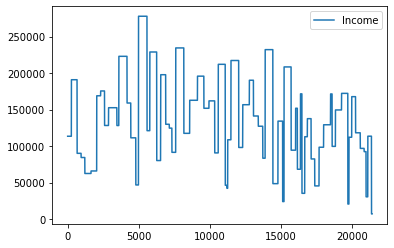

In [ ]:
df.plot(y = 'Income')

<AxesSubplot:xlabel='price'>

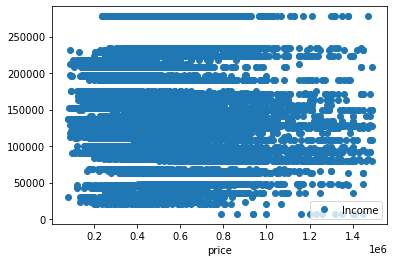

In [ ]:
df.plot(x='price', y='Income', style='o')

<AxesSubplot:>

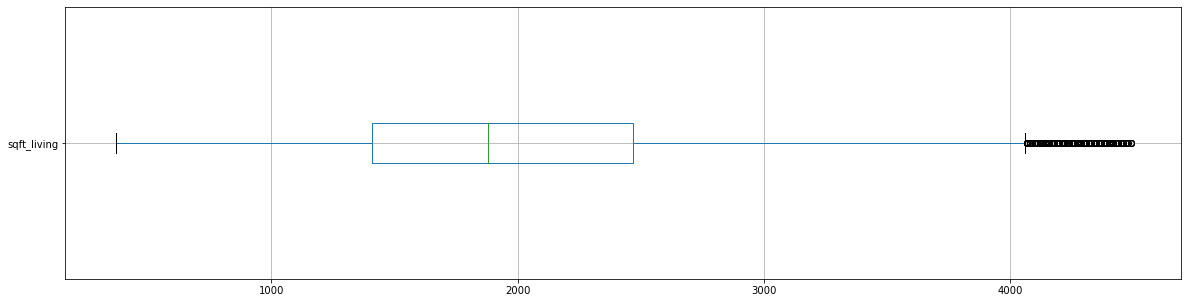

In [ ]:
df.boxplot('sqft_living', vert=False, figsize=(20,5))

In [ ]:
df["season"].value_counts()

1    6522
2    5654
3    4547
0    3943
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='price'>

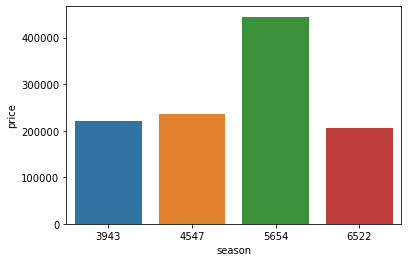

In [ ]:
sns.barplot(x =df["season"].value_counts(), y =df["price"] ,data=df)

In [ ]:
pd.set_option('display.max_columns', None)
seasons = df.groupby("season").mean()
seasons

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,renovated
season,,,,,,,,,,,,,,,,,,,,,,,
0,484014.961958,3.326655,2.028024,1950.065940,14383.822977,1.456252,0.002790,3.750190,0.784428,8.012173,1688.131879,255.679939,1970.902359,58.173218,35.163327,47.549445,-122.214690,1907.229521,11698.400457,146326.583059,51.097641,2015.00000,0.029166
1,509936.719411,3.336093,2.074862,2000.621588,14489.397424,1.485051,0.003833,3.762190,0.860472,7.973781,1722.856639,271.940969,1970.614075,63.339466,35.938976,47.562086,-122.214560,1952.373965,12578.518246,144390.155474,51.385925,2014.42533,0.031739
2,497825.234170,3.336753,2.090202,2021.266891,14155.815175,1.496463,0.002830,3.766537,0.903254,8.025822,1752.155288,262.390697,1971.453307,68.533781,34.795720,47.560522,-122.209455,1963.853378,12223.715246,143971.573576,50.546693,2014.00000,0.034312
3,487789.072795,3.322630,2.055861,1992.416758,14819.868925,1.486365,0.004618,3.754344,0.840774,7.982186,1719.767539,268.908291,1970.340444,65.358038,35.493072,47.558917,-122.219443,1925.564548,12594.062019,146729.953816,51.659556,2014.00000,0.032769


In [ ]:
seasons

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,renovated
season,,,,,,,,,,,,,,,,,,,,,,,
0,484014.961958,3.326655,2.028024,1950.065940,14383.822977,1.456252,0.002790,3.750190,0.784428,8.012173,1688.131879,255.679939,1970.902359,58.173218,35.163327,47.549445,-122.214690,1907.229521,11698.400457,146326.583059,51.097641,2015.00000,0.029166
1,509936.719411,3.336093,2.074862,2000.621588,14489.397424,1.485051,0.003833,3.762190,0.860472,7.973781,1722.856639,271.940969,1970.614075,63.339466,35.938976,47.562086,-122.214560,1952.373965,12578.518246,144390.155474,51.385925,2014.42533,0.031739
2,497825.234170,3.336753,2.090202,2021.266891,14155.815175,1.496463,0.002830,3.766537,0.903254,8.025822,1752.155288,262.390697,1971.453307,68.533781,34.795720,47.560522,-122.209455,1963.853378,12223.715246,143971.573576,50.546693,2014.00000,0.034312
3,487789.072795,3.322630,2.055861,1992.416758,14819.868925,1.486365,0.004618,3.754344,0.840774,7.982186,1719.767539,268.908291,1970.340444,65.358038,35.493072,47.558917,-122.219443,1925.564548,12594.062019,146729.953816,51.659556,2014.00000,0.032769


<AxesSubplot:xlabel='season', ylabel='price'>

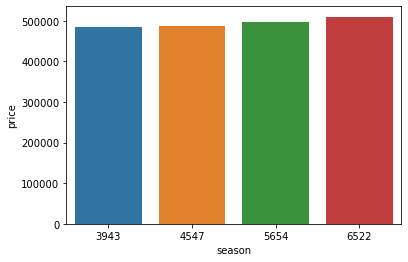

In [ ]:
sns.barplot(x =df["season"].value_counts(), y =seasons["price"] ,data=df)

In [ ]:
y = df["price"]

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:57:11   Log-Likelihood:            -2.7429e+05
No. Observations:               20666   AIC:                         5.486e+05
Df Residuals:                   20643   BIC:                         5.488e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.234e+04   1492.553    -14.970      0.000   -2.53e+04   -1.94e+04
bathrooms      3.781e+04   2406.776     15.708      0.000    3.31e+04    4.25e+04
sqft_living     119.5813     13.755      8.693      0.000      92.620     146.543
sqft_lot          0.2225      0.035      6.328      0.000       0.154       0.291
floors         5.135e+04   2621.637     19.585      0.000    4.62e+04    5.65e+04
waterfront     2.474e+05   1.69e+04     14.661      0.000    2.14e+05     2.8e+05
view          -2.614e+04   1196.048    -21.857      0.000   -2.85e+04   -2.38e+04
condition      1.546e+04    881.537     17.533      0.000    1.37e+04    1.72e+04
grade         -6853.1116    500.610    -13.690      0.000   -7834.348   -5871.876
sqft_above       20.7932     13.731      1.514      0.130      -6.121      47.707
sqft_basement     6.9889     13.622      0.513      0.608     -19.711      33.688
yr_built      -5.052e+04   3188.071    -15.847      0.000   -5.68e+04   -4.43e+04
yr_renovated   3613.5528    341.740     10.574      0.000    2943.715    4283.391
zipcode       -1089.3982     64.667    -16.846      0.000   -1216.151    -962.645
lat            6.322e+05   7585.817     83.334      0.000    6.17e+05    6.47e+05
long          -2.196e+05   9547.769    -23.004      0.000   -2.38e+05   -2.01e+05
sqft_living15    83.6292      2.532     33.027      0.000      78.666      88.592
sqft_lot15       -0.2428      0.055     -4.426      0.000      -0.350      -0.135
Income           -0.2768      0.018    -15.133      0.000      -0.313      -0.241
house_age     -4.911e+04   3191.196    -15.388      0.000   -5.54e+04   -4.29e+04
year_sold      2.252e+04   3136.320      7.181      0.000    1.64e+04    2.87e+04
season         1017.7691   1416.544      0.718      0.472   -1758.770    3794.308
renovated     -7.158e+06   6.82e+05    -10.495      0.000   -8.49e+06   -5.82e+06
==============================================================================
Omnibus:                     3390.520   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9721.209
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       5.868   Cond. No.                     1.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df["season"].value_counts()

1    6522
2    5654
3    4547
0    3943
Name: season, dtype: int64

In [ ]:
#red= srping, green = summer, yellow= fall, blue = winter

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


In [ ]:
y = df.groupby(["season","zipcode"])
y

In [ ]:
# 1= srping, 2= summer, 3 = fall, 4 = winter

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,113555.0,67,2014,fall,not_renovated,0
1,205425.0,2,1.00,880,6780,1.0,NO,Good,6 Low Average,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,113555.0,77,2014,spring,not_renovated,0
2,445000.0,3,2.25,2100,8201,1.0,NO,Average,8 Good,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,113555.0,55,2014,summer,not_renovated,1
3,236000.0,3,1.00,1300,5898,1.0,NO,Average,7 Average,1300,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,113555.0,61,2014,summer,not_renovated,0
4,170000.0,2,1.00,860,5265,1.0,NO,Average,6 Low Average,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,113555.0,91,2015,winter,not_renovated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,NO,Good,11 Excellent,3990,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,7190.0,33,2014,fall,not_renovated,0
21416,1950000.0,4,3.50,4065,18713,2.0,NO,Good,10 Very Good,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,7190.0,35,2014,summer,not_renovated,0
21417,2250000.0,5,5.25,3410,8118,2.0,NO,Average,11 Excellent,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,7190.0,16,2015,spring,not_renovated,0
21418,2900000.0,5,4.00,5190,14600,2.0,NO,Average,11 Excellent,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,7190.0,9,2014,fall,not_renovated,1


In [ ]:
i = df.groupby("view_cat")["price"].median()
i

view_cat
0    435000.0
1    750000.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='price'>

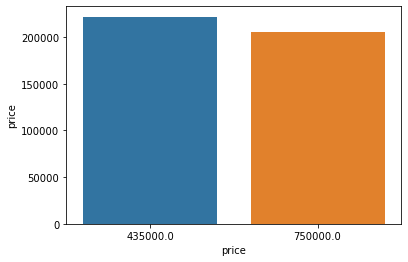

In [ ]:
sns.barplot(x =i, y =df["price"] ,data=df,ci = False)

<AxesSubplot:xlabel='view_cat', ylabel='price'>

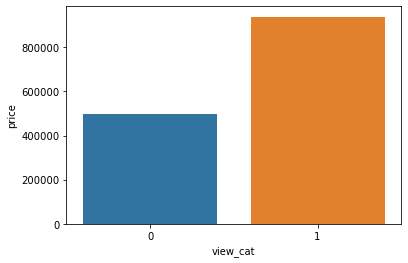

In [ ]:
sns.barplot(x =df["view_cat"], y =df["price"] ,data=df,ci = False)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,113555.0,67,2014,fall,not_renovated,0
1,205425.0,2,1.00,880,6780,1.0,NO,Good,6 Low Average,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,113555.0,77,2014,spring,not_renovated,0
2,445000.0,3,2.25,2100,8201,1.0,NO,Average,8 Good,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,113555.0,55,2014,summer,not_renovated,1
3,236000.0,3,1.00,1300,5898,1.0,NO,Average,7 Average,1300,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,113555.0,61,2014,summer,not_renovated,0
4,170000.0,2,1.00,860,5265,1.0,NO,Average,6 Low Average,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,113555.0,91,2015,winter,not_renovated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,NO,Good,11 Excellent,3990,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,7190.0,33,2014,fall,not_renovated,0
21416,1950000.0,4,3.50,4065,18713,2.0,NO,Good,10 Very Good,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,7190.0,35,2014,summer,not_renovated,0
21417,2250000.0,5,5.25,3410,8118,2.0,NO,Average,11 Excellent,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,7190.0,16,2015,spring,not_renovated,0
21418,2900000.0,5,4.00,5190,14600,2.0,NO,Average,11 Excellent,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,7190.0,9,2014,fall,not_renovated,1


In [ ]:
df.groupby("zipcode")